In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

#### Pre-Processing

In [13]:
df = pd.read_csv('student_success_dataset.csv')

print('First five rows of data: ')
print(df.head())

print('\nShape of the data: ')
print(f'Rows: {df.shape[0]} columns: {df.shape[1]}')

print("\nDataset info: ")
print(df.info())

print('\nSummary staticts: ')
print(df.describe(include='all'))

print('\nMissing Values: ')
print(df.isnull().sum())

First five rows of data: 
   StudyHours  Attendance  PastScore Internet  SleepHours Passed
0           2          60         40      Yes           5     No
1           5          85         60      Yes           6    Yes
2           8          90         75      Yes           8    Yes
3           3          70         50      Yes           5     No
4           7          85         70       No           7    Yes

Shape of the data: 
Rows: 21 columns: 6

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  21 non-null     int64 
 1   Attendance  21 non-null     int64 
 2   PastScore   21 non-null     int64 
 3   Internet    21 non-null     object
 4   SleepHours  21 non-null     int64 
 5   Passed      21 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None

Summary staticts: 
        StudyHours  Attendance

#### Processing (Clean Data)

In [17]:
le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed'] = le.fit_transform(df['Passed'])

print('After Encoding: ')
print(df.head())

print('\nData-Types after cleaning: ')
print(df.dtypes)

After Encoding: 
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40         1           5       0
1           5          85         60         1           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1

Data-Types after cleaning: 
StudyHours    int64
Attendance    int64
PastScore     int64
Internet      int64
SleepHours    int64
Passed        int64
dtype: object


#### Feature Scaling

In [ ]:
features = ['StudyHours','Attendance','PastScore','Internet','SleepHours']
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[features]= scaler.fit_transform(df_scaled[features])

print('Data after Scaling: ')
print(df_scaled.head())

Data after Scaling: 
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0   -1.153853   -0.828170  -1.048888  0.707107   -0.512348       0
1   -0.100335    0.660834   0.030850  0.707107    0.000000       1
2    0.953183    0.958635   0.840653  0.707107    1.024695       1
3   -0.802680   -0.232568  -0.509019  0.707107   -0.512348       0
4    0.602010    0.660834   0.570719 -1.414214    0.512348       1


#### Split the Data

In [25]:
X = df_scaled[features]
y = df["Passed"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Train a Model

In [26]:
model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### Make Prediction

In [41]:
y_pred = model.predict(X_test)
print("Prediction made by model: ",y_pred)

Prediction made by model:  [0 0 1 1 1]


#### Evalute the Model

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute ERROR (MAE): ", round(mae, 2))
print("Mean Squared ERROR (MSE): ", round(mse, 2))
print("Root Mean Squared ERROR (RMSE): ", round(rmse, 2))
print("r^2 Score (Model accurecy): ", round(r2, 4))

print('\nClassification_report: ')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix: ')
print(conf_matrix)

Mean Absolute ERROR (MAE):  0.2
Mean Squared ERROR (MSE):  0.2
Root Mean Squared ERROR (RMSE):  0.45
r^2 Score (Model accurecy):  -0.25

Classification_report: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.75      0.86         4

    accuracy                           0.80         5
   macro avg       0.75      0.88      0.76         5
weighted avg       0.90      0.80      0.82         5


Confusion Matrix: 
[[1 0]
 [1 3]]


#### Visualize the Results

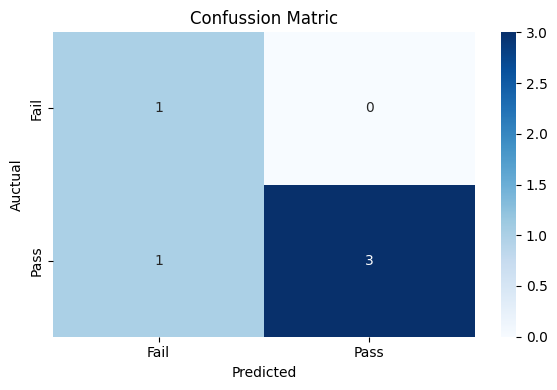

In [39]:
plt.figure(figsize=(6, 4))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Fail", "Pass"],
    yticklabels=["Fail", "Pass"],
)
plt.xlabel('Predicted')
plt.ylabel('Auctual')
plt.title('Confussion Matric')
plt.tight_layout()
plt.show()

#### Improve / Experiment

In [47]:
print('Predict your Result')
try:
  study_hours = float(input("Tell me how many hours you study daily"))
  attendance = float(input('tell me your attendance'))
  past_score = float(input('How much marks you scored in your last exam?'))
  internet = float(input('do you have internet Access'))
  sleep_hours =float(input("How many Hours you sleep?"))
  
  user_input_df = pd.DataFrame([{
    'StudyHours': study_hours,
    'Attendance': attendance,
    'PastScore': past_score,
    'Internet': internet,
    'SleepHours': sleep_hours
  }])
  user_input_scaled = scaler.fit_transform(user_input_df)
  prediction = model.predict(user_input_scaled)[0]

  result = 'Pass' if prediction == 1 else 'Fail'
  print(f'Based on your input you might {result}')
except Exception as e:
  print(e)

Predict your Result
Based on your input you might Pass


d:\Scikit-Learn\env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Wrap-Up